# Этап 4

Этот этап включает в себя создание Docker-образа для вашего проекта и изменение манифеста MLflow Project для запуска вашего эксперимента в изолированном Docker-контейнере. Вот шаги, которые вам нужно выполнить:

## 1. Создание Dockerfile и файла requirements.txt

В **корневой директории** вашего проекта создайте файл Dockerfile и requirements.txt с следующим содержимым:

In [1]:
# В каталоге вашего проекта создайте файл с именем MLproject (без расширения файла).

import os

# Создание файлов внутри директорий
open("Dockerfile", "w").close()
open("requirements.txt", "w").close()

In [2]:
import os

In [2]:
Docker_ML_content = """
# Используйте официальный образ Python
FROM python:3.10-slim-buster

# Установите рабочую директорию в /app
WORKDIR /app

# Копируйте текущий каталог в /app
COPY . /app

# Установите все необходимые пакеты из файла requirements.txt
COPY requirements.txt /tmp
RUN pip install -r /tmp/requirements.txt

# Запустите train.py при запуске контейнера
CMD ["python", "train.py"]
"""
with open("Dockerfile", "w") as file:
    file.write(Docker_ML_content)

In [3]:
requirements_ML_content = """
cryptography==41.0.3
boto3==1.28.39
mlflow==2.6.0
pymysql==1.1.0
scikit-learn==1.0.2
pandas==1.4.4
"""

with open("requirements.txt", "w") as file:
    file.write(requirements_ML_content)


## 2. Сборка Docker-образа

In [4]:
!docker build -f Dockerfile -t kinopoisk:1.0.0 .

2024/01/20 22:12:49 http2: server: error reading preface from client //./pipe/docker_engine: file has already been closed
#1 [internal] load .dockerignore
#1 transferring context: 2B 0.0s done
#1 DONE 0.1s

#2 [internal] load build definition from Dockerfile
#2 transferring dockerfile: 573B 0.0s done
#2 DONE 0.1s

#3 [internal] load metadata for docker.io/library/python:3.10-slim-buster
#3 DONE 2.5s

#4 [1/5] FROM docker.io/library/python:3.10-slim-buster@sha256:37aa274c2d001f09b14828450d903c55f821c90f225fdfdd80c5180fcca77b3f
#4 CACHED

#5 [internal] load build context
#5 transferring context: 421.44kB 0.1s done
#5 DONE 0.1s

#6 [2/5] WORKDIR /app
#6 DONE 0.1s

#7 [3/5] COPY . /app
#7 DONE 0.1s

#8 [4/5] COPY requirements.txt /tmp
#8 DONE 0.0s

#9 [5/5] RUN pip install -r /tmp/requirements.txt
#9 1.615 Collecting cryptography==41.0.3
#9 1.849   Downloading cryptography-41.0.3-cp37-abi3-manylinux_2_28_x86_64.whl (4.3 MB)
#9 2.705      ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 

## 3. Изменение манифеста MLflow Project

In [5]:
MLproject_content = """
name: kinopoisk_project

docker_env:
  image: kinopoisk:1.0.0

entry_points:
  main:
    parameters:
      data_file: {type: str, default: "datasets/kinopoisk_train.csv"}
    command: "python train.py"
"""
with open("MLproject", "w") as file:
    file.write(MLproject_content)

## 4. Запуск эксперимента с помощью MLflow

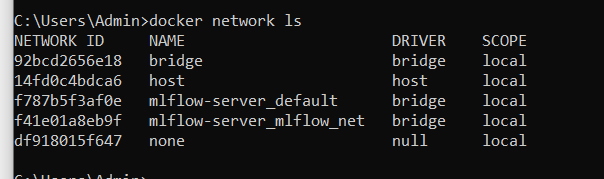


In [6]:
!mlflow run . --experiment-name=kinopoisk --docker-args network=mlflow-server_mlflow_net --build-image

"mlflow" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


## 5. Запуск эксперимента прямо из репозитория

In [7]:
!mlflow run https://github.com/RuDotPy/Skillbox_ml_project2.git --experiment-name=kinopoisk --docker-args network=mlflow-server_mlflow_net --build-image

"mlflow" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


Теперь ваш эксперимент будет запускаться в изолированном Docker-контейнере с фиксированным окружением, и код для эксперимента будет извлекаться из вашего удаленного Git-репозитория, что обеспечивает повторяемость и воспроизводимость экспериментов.